# 第９回　推測統計（１）

今回は、確率の考え方、確率分布の考え方、正規分布、二項分布、ポアソン分布、指数分布　などを扱います。

第８回で紹介した内容は、統計学の中でも、「記述統計」とよばれる分野に属します。つまり、データそのものの性質を記述し、要約するための方法を紹介しました。そのために、平均、標準偏差、四分位数といった数値や、度数分布表、ヒストグラム、箱ひげ図といった図表を使いました。

これに対して、今回よりのちの内容は、データそのものではなくデータのもとになっている集団の性質を推測するための方法論である「推測統計」という分野に属します。この場合、データは実験や調査によって得られ、データのもとになっている集団の一部を抜き出したものと考えられます。それで、データのことを標本あるいはサンプルといい、データのもとになっている集団のことを母集団といいます。

母集団から標本を取る際、また、標本の性質を理解するためには、確率の考え方が必要になります。確率は、不確実あるいはランダムな現象にかかわる問題を定量的に扱うためのツールとなります。

## 事象と確率

### 確率が用いられる場面

過去のデータから、起こりうる結果がある程度予測されるが、１回ごとの結果は偶然に支配され、事前に予測できないという場面がいろいろあります。
- くじを引いたら何が出るか。サイコロやコインを投げたら何が出るか。
- 買おうとする電気製品の寿命はどれだけか
- 経営する店に明日、お客が何人来るか

行動に先立って、これらの場面で起こる可能性のある現象を不確実性・ランダム性に基づいて評価する必要があります。  
また、起きた結果が、今までのデータでは説明できないようなできごとでないかどうか、検証する必要があります。  
こういった評価・検証を行う際のツールとして、確率が用いられます。

### 試行と事象

#### 基本的な用語の整理

- 試行：サイコロを投げる、工業製品を製造する、といった例のように、１回ずつあるいは１個ずつの個別の結果が偶然に左右される実験や観測のことをいいます。
- 根元（根本）事象：試行によって起こる個々の結果をいいます。
- 事象(eventt)：根元事象の集合のことをいいます。ですから、根元事象も事象に含まれます。
- 全事象（または標本空間）：すべての根元事象の集合

事象は根元事象の集合を表すので、事象の集合に関して次のような用語があります。

- 和事象：事象$A_1, A_2, ..., A_n$のうち、少なくとも１つが起こるという事象（集合の用語では和集合）$$A_1 \cup A_2 \cup...\cup A_n$$
- 積事象：事象$A_1, A_2, ..., A_n$が同時に起こるという事象すなわち$$A_1 \cap A_2 \cap ... \cap A_n$$
- 空事象：何も起こらないという事象（空集合に相当）。記号$\Phi$で表す。
- 余事象：全事象の中で$A$に含まれていない根元事象からなる事象（補集合に相当）。$A^c$と表し、$$A \cup A^c = \Omega$$ $$A \cap A^c = \Phi$$

- 互いに排反：事象$A_1, A_2, ..., A_n$の中の任意の２つ$A_i$, $A_j$, $i \neq j$の積事象が空事象$\Phi$である場合、これらの事象は互いに排反（集合の用語では互いに素）であるという。

#### 根元事象を列挙する

ある事象の起こる確率を計算するためのひとつの方法は、起こる事象をすべて数え上げて、その中のどれだけ問題とする事象が含まれるか、割合を計算するというやりかたです。そのためにはまず根元事象を数え上げる必要があります。例えば、「'a', 'b', 'c', 'd', 'e'のいずれかが描かれた５枚のカードから３枚を選ぶ」という試行の結果起こる根元事象をすべて列挙してみましょう。

このために、「itertools」というライブラリを使います。

関数itertools.combinations()はリストと選ぶ枚数を引数に与えると、すべての組み合わせが含まれるオブジェクトを返します。その中身を見るためには、関数list()を使います。下の例のように、ひとつの組み合わせをタプルとし、組み合わせのリストが得られます。

In [16]:
import itertools
cards = ['a', 'b', 'c', 'd', 'e']
three_cards_combi = list(itertools.combinations(cards, 3))
for v in three_cards_combi:
    print(v)

('a', 'b', 'c')
('a', 'b', 'd')
('a', 'b', 'e')
('a', 'c', 'd')
('a', 'c', 'e')
('a', 'd', 'e')
('b', 'c', 'd')
('b', 'c', 'e')
('b', 'd', 'e')
('c', 'd', 'e')


In [17]:
len(three_cards_combi)

10

このように、１０通りの根元事象（根本事象）が得られました。

### 確率

このように定めた「事象」の起こりやすさを測る尺度が「確率」（probability）です。各々の事象には確率の値が対応しています。  

確率の値は0から1までの間と定めます。また、すべての「根本事象」の確率の総和を1とします。つまり、確率は次のように定義される関数$P$です。

- 任意の事象$A$について$0 \leqq P(A) \leqq 1$
- 全事象$\Omega$について$P(\Omega) = 1$
- $A_1, A_2, ...$が互いに排反な事象ならば、$P(A_1 \cup A_2 \cup ...) = P(A_1) + P(A_2) + ...$

例えば、先程の５枚のカードから３枚を選ぶとき、全部で10とおりあり、すべて同じ起こりやすさだと考えられますので、「"a, b,c"の組み合わせ」という事象の確率は$1/10 = 0.1$となります。

また、「'a'のカードを含む組み合わせ」は全部で6とおりありますので、そのような事象の確率は6/10 = 0.6となります。

さて、この事象と「'a'のカードを含まない組み合わせ」の事象とは互いに「排反」です。つまり、共通する部分集合が存在しません。  
そして、全事象は、「'a'のカードを含む組み合わせ」か「'a'のカードを含まない組み合わせ」かのどちらかです。すなわち、これら２つの事象の確率を足すと1になります（このように、標本空間の中で、「事象Aがおこらない」という事象を「余事象」といいます）。  
ですから、「'a'のカードを含まない組み合わせ」の事象（つまり、「'a'のカードを含む組み合わせ」の余事象）の確率は、1 - 0.6 = 0.4となります。  
実際、上の例で確かに4とおりありますので、確率は4/10 = 0.4となります。

（参考）算数で場合の数を計算してみましょう。まず、「'a'のカードを含む組み合わせ」の場合の数は、次のように数えます。  
「1枚は'a'で固定する。2枚目と3枚目を残り4枚から選ぶ。2枚目には4とおり、3枚目には3とおり考えられるので、4x3とおりだが、2枚目と3枚目の順番は関係ないので、2の順列すなわち2! = 2x1で割る。従って、4×3/2×1 = 6とおり」となります。  
ですから、「'a'のカードを含まない組み合わせ」は、10 - 6 = 4 とおり　です。

### 確率変数と確率分布

事象に結び付けられた数値を「確率変数」といいます。例えば、コインを５回投げたときの表の回数は、k回表が出るという事象の確率変数といえます。事象と確率は結びついていますから、確率変数は、確率に結びついています。確率変数と確率との対応関係を、「確率分布」といいます。  

### 確率関数と確率密度関数

確率変数と確率との関係は、確率変数が離散の場合は確率関数、連続の場合は確率密度関数といいます。

- 離散型確率変数$X$のとりうる値を$\{x_1, x_2, ...\}$とし、それに対して確率$\{P(X = x_i) = f(x_i) (i = 1, 2, ...)\}$が与えられているとき、$f(x_i) (i = 1, 2, ...)$を確率関数（または確率質量関数）といいます。
- 確率の公理より、次の条件を満たします。$$0 \leqq f(x_i) \leqq 1$$ $$\sum_{i=1}^\infty f(x_i) = 1$$

一方、連続的な確率変数$X$については、ある特定の一つの値$X = x$に対する確率を決めることはできません。

その代わりに、確率変数$X$が任意の$x$における微小な$\Delta x$において、$X$が区間$[x, x + \Delta x]$の値を取る確率が確率密度関数$f(x)$を用いて、次のように定義されます。$$P(x \leqq X \leqq x + \Delta x) \simeq f(x)\Delta x$$

これはすなわち、積分の形で書くと、$$P(a \leqq X \leqq b) = \int_a^b f(x)dx$$（ただし$f(x) \geqq 0$）ということです。

$f(x)$についても、確率の公理より、$$\int_{-\infty}^\infty f(x)dx = 1$$を満たさなければいけません。

さて、確率変数$X$が離散型、連続型、どちらの場合でも、累積分布関数（あるいは分布関数）$F(x)$が、$$F(x) = P(X \leqq x)$$によって定義されます。とくに連続型の場合には、$$F(x) = P(X \leqq x) = \int_{-\infty}^x f(u)du$$と表されます。  
つまり累積分布関数が連続で微分可能のとき、その導関数が確率密度関数となります。  
離散型の場合は、$$F(x) = \sum_{i=1}^{n} f(x_i)\;ただしx_n = x$$となります。

累積分布関数は、後の例題のように、起こってほしくない事象・稀な事象の予測やコントロール（例：品切れの確率を抑えるために必要な在庫は？）のために使います。

### 期待値

離散型の場合、確率変数$X$の期待値は、$f(x)$を確率関数として次のように定義されます。$$E[X] \equiv \sum_i x_if(x_i) = \mu$$

一方、連続型の場合、確率変数$X$の期待値は、$f(x)$を確率密度関数として、次のように定義されます。$$E[X] \equiv \int_{-\infty}^\infty xf(x)dx = \mu$$

ここまでの事項について、次の例で検討しましょう。

### 例１：コインを５回投げたときの表の枚数$k$の確率分布と期待値

例えば、コインを５回投げたときの表の枚数$k$の確率分布はどうなるでしょうか？  
まず、５回投げたときの出かたをすべて書き出してみましょう。

今度も、itertoolsを使います。今度は、関数itertools.product()を使います。引数として与えられるのは、１回の試行でとりうる値のリストと、試行回数$n$を与えるオプションrepeat=$n$です。

In [14]:
import itertools
coin = ['0','1'] # 表が1, 裏が0
five_throws = list(itertools.product(coin,repeat=5))

In [15]:
five_throws

[('0', '0', '0', '0', '0'),
 ('0', '0', '0', '0', '1'),
 ('0', '0', '0', '1', '0'),
 ('0', '0', '0', '1', '1'),
 ('0', '0', '1', '0', '0'),
 ('0', '0', '1', '0', '1'),
 ('0', '0', '1', '1', '0'),
 ('0', '0', '1', '1', '1'),
 ('0', '1', '0', '0', '0'),
 ('0', '1', '0', '0', '1'),
 ('0', '1', '0', '1', '0'),
 ('0', '1', '0', '1', '1'),
 ('0', '1', '1', '0', '0'),
 ('0', '1', '1', '0', '1'),
 ('0', '1', '1', '1', '0'),
 ('0', '1', '1', '1', '1'),
 ('1', '0', '0', '0', '0'),
 ('1', '0', '0', '0', '1'),
 ('1', '0', '0', '1', '0'),
 ('1', '0', '0', '1', '1'),
 ('1', '0', '1', '0', '0'),
 ('1', '0', '1', '0', '1'),
 ('1', '0', '1', '1', '0'),
 ('1', '0', '1', '1', '1'),
 ('1', '1', '0', '0', '0'),
 ('1', '1', '0', '0', '1'),
 ('1', '1', '0', '1', '0'),
 ('1', '1', '0', '1', '1'),
 ('1', '1', '1', '0', '0'),
 ('1', '1', '1', '0', '1'),
 ('1', '1', '1', '1', '0'),
 ('1', '1', '1', '1', '1')]

このように、各事象は５つの要素からなるタプルで表現されています。また、そのタプルのそれぞれの要素は表が'1'、裏が'0'という文字で表現されています。  
1投めから5投めまでには、2^5 = 32とおりの表・裏の出かたがあります。確かめてみましょう。

In [3]:
len(five_throws)

32

表と裏の出る確率が1/2ずつだとすると、これらの出かたの確率はすべて、$(1/2)^5 = 1/32 = 0.03125$になります。このとき、確率変数すなわち表の枚数の分布を調べてみましょう。

配列（アレイ）を使うので、NumPyのライブラリを使います。また、Matplotlibのライブラリpyplotを、ヒストグラムを描くために使います。　  
インライン描画を可能にするために%matplotlib inlineを宣言します。

In [16]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

それぞれの事象（５投の目の出かた）ごとに表の枚数を格納するための配列count_topsを作り、初期値として0を与えます。  
numpy.zeros()は配列の長さを引数として、要素がすべてゼロの配列を返します。

In [17]:
count_tops = np.zeros(len(five_throws)) # 要素数はこの場合32

配列five_throwsの各要素である、それぞれの事象をあらわすタプル（５つの要素からなる）について表の数を数えます。

In [27]:
t_index = 0 #それぞれの事象の表の数を入れる配列の先頭の添え字
#外側のループでは、それぞれの事象の表の数を、あらかじめゼロが全部入った配列を上書きして、記録します。
for t in five_throws: # tは1つのタプルです。
    num_tops = 0 # その事象の表の数を初期化します。
    #内側のループでは、ひとつの事象の１投１投の裏表を取り出し、表の数を累積します。
    for i in t: # i はタプルの1つの要素です
        i_int = int(i) #表なら1、裏なら0です。
        num_tops = num_tops + i_int
    count_tops[t_index] = num_tops
    t_index += 1 # 次の要素の添え字

32とおりの事象において、表の出る回数は次のようになります。

In [28]:
count_tops

array([0., 1., 1., 2., 1., 2., 2., 3., 1., 2., 2., 3., 2., 3., 3., 4., 1.,
       2., 2., 3., 2., 3., 3., 4., 2., 3., 3., 4., 3., 4., 4., 5.])

5投して表の出る枚数のヒストグラムを次のようにして書きます。

(array([ 1.,  5., 10., 10.,  5.,  1.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <BarContainer object of 6 artists>)

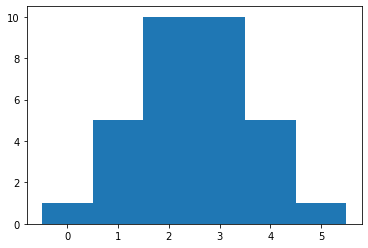

In [29]:
intervals = np.arange(-0.5,6.5,1) # 各階級の中心が0, 1, 2, 3, 4, 5になるように端の値を設定します
plt.hist(count_tops,bins=intervals)

上のヒストグラムは、全事象において、それぞれの枚数が出る事象の数を表しています。  
そこで次に、それぞれの枚数が出る確率のヒストグラムを描きます。

さらにこの次に「二項分布」のヒストグラムを描くことに備えて、上のプログラムを次のように修正します。  
まず、それぞれの根元事象が起きる確率を計算します。  
つまり、上の$f(x_i)$の計算です。  
コインを投げたとき、表が出るか裏が出るかどちらかです（ベルヌーイ試行といいます）。  
表の確率を$p$, 裏の確率を$1-p$とすると、例えば表裏表表裏となる確率は、  
$p(1-p)pp(1-p)$  
となります。  
さらに、表が同じ回数の根元事象ごとに、この確率を加算します。そうすることで、新たな事象ー表の回数が同じ根元事象の集合ーの確率が計算できます。

In [12]:
weight_all = np.zeros(len(five_throws)) # １つの事象（５回のコイン投げ）ごとの重みを格納する配列の初期化。今回は３２個。
weight_events = np.zeros(6) # 同じ回数の表を１事象としたときの事象ごとの重みの和の配列の初期化。表の回数は0回から5回まで。
t_index = 0 # 1つの事象ごとの表の枚数や重みを格納する配列の添字の初期化。添字は0からなので0で。
p = 0.5 # 表の確率
q = 1 - p # 裏の確率
# 次のループで、３２個の事象ごとに表の回数を数え、その事象の起こる確率を計算する。
for t in five_throws:
    num_tops = 0 #表の回数を初期化
    weight = 1 # 重みを初期化
    # 次のループで、事象のタプルを構成する1投ごとに表の枚数と重みを更新する
    for i in t:
        i_int = int(i) # 文字列の'1', '0'を整数に変換
        num_tops = num_tops + i_int # 表の枚数を更新
        weight = weight * p**i_int * q**(1-i_int) # 表ならpを、裏ならqを、重みにかけることで重みを更新する。
    count_tops[t_index] = num_tops # ループを抜けたので表の枚数を格納する
    weight_all[t_index] = weight # ループを抜けたので重みを格納する
    weight_events[num_tops] += weight # 表の回数ごとに重みを足していく
    t_index += 1 # 添字を１増やす

各事象の表の枚数は、さきほどと同じです。

In [33]:
count_tops

array([0., 1., 1., 2., 1., 2., 2., 3., 1., 2., 2., 3., 2., 3., 3., 4., 1.,
       2., 2., 3., 2., 3., 3., 4., 2., 3., 3., 4., 3., 4., 4., 5.])

各根元事象の重み（確率）はすべて同じで、$(0.5)^5 = 0.03125$です。

In [14]:
weight_all

array([0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125])

表の枚数が0, 1, 2, 3, 4, 5枚である確率はそれぞれ次のようになります。

In [15]:
weight_events

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

確率ですから、これらの和は当然1にならねばいけません。

In [16]:
sum(weight_events)

1.0

表の枚数の確率をヒストグラムにするには、Matplotlib.pyplot.hist()関数のweightsオプションに、上で求めた、それぞれの事象の重み（確率）を与えればよいです。

(array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <BarContainer object of 6 artists>)

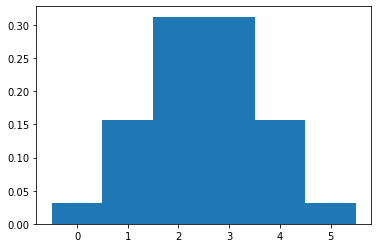

In [17]:
plt.hist(count_tops, weights=weight_all, bins=intervals)

表の枚数の期待値が二項分布の期待値$np = 5x0.5$に等しいことを確かめましょう。

期待値は、それぞれの確率変数の値ｘ確率　の総和です。

In [18]:
e_tops = np.dot(count_tops,weight_all)
e_tops

2.5

表の枚数の分散が二項分布の分散npq = 5x0.5x0.5に等しいことを確かめましょう。

In [25]:
# array型（配列）の変数からスカラをひくと、配列のすべての要素からスカラをひきます
# array型（配列）の変数どうしの「*」演算は、要素どうしの積です
sum((count_tops - e_tops) * (count_tops - e_tops) * weight_all)

1.25

根元事象の起こる確率はすべて同じなので、単純にnp.var()関数で分散を求めることもできます。

In [35]:
np.var(count_tops)

1.25

## 二項分布

### 例２：表と裏の出る確率が違うコインを投げる

仮に、コインの表の出る確率が0.4, 裏の出る確率が1-0.4 = 0.6ならば、5枚のうち表の出る枚数の確率分布はどうなるでしょうか？

さきほどのプログラムで、p = 0.4として実行してみましょう。

In [36]:
weight_all = np.zeros(len(five_throws)) # １つの事象（５回のコイン投げ）ごとの重みを格納する配列の初期化
weight_events = np.zeros(6) # 同じ回数の表を１事象としたときの事象ごとの重みの和の配列の初期化。
# 表の回数は0回から5回まで。
t_index = 0 # 1つの事象ごとの表の枚数や重みを格納する配列の添字の初期化。添字は0からなので0で。
p = 0.4 # 表の確率
q = 1 - p # 裏の確率
for t in five_throws:
    num_tops = 0 #表の回数を初期化
    weight = 1 # 重みを初期化
    # 次のループで、事象のタプルを構成する1投ごとに表の枚数と重みを更新する
    for i in t:
        i_int = int(i) # 文字列の'1', '0'を整数に変換
        num_tops = num_tops + i_int # 表の枚数を更新
        weight = weight * p**i_int * q**(1-i_int) # 表ならpを、裏ならqを、重みにかけることで重みを更新する。
    count_tops[t_index] = num_tops # ループを抜けたので表の枚数を格納する
    weight_all[t_index] = weight # ループを抜けたので重みを格納する
    weight_events[num_tops] += weight # 表の回数ごとに重みを足していく
    t_index += 1 # 添字を１増やしてループの最初に戻る

今度は、３２とおりの各事象の確率はつぎのようになります。

In [37]:
weight_all

array([0.07776, 0.05184, 0.05184, 0.03456, 0.05184, 0.03456, 0.03456,
       0.02304, 0.05184, 0.03456, 0.03456, 0.02304, 0.03456, 0.02304,
       0.02304, 0.01536, 0.05184, 0.03456, 0.03456, 0.02304, 0.03456,
       0.02304, 0.02304, 0.01536, 0.03456, 0.02304, 0.02304, 0.01536,
       0.02304, 0.01536, 0.01536, 0.01024])

表が0~5枚の確率は、それぞれ次のようになります。

In [38]:
weight_events

array([0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])

当然、これらの和は1です。

In [39]:
sum(weight_events)

1.0

表が0~5枚の確率をヒストグラムにしてみましょう。0枚、1枚の確率が5枚、4枚よりも高くなっているのがわかりますね。

(array([0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <BarContainer object of 6 artists>)

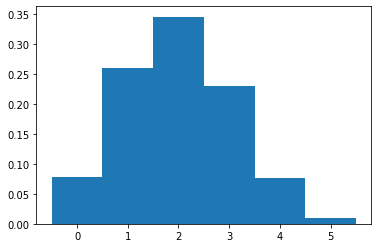

In [31]:
plt.hist(count_tops, weights=weight_all, bins=intervals)

平均が、二項分布$B(n,p) = B(5,0.4)$ の平均$np = 5 x 0.4 = 2$に等しいことを確かめます。

In [40]:
e_tops = np.dot(count_tops,weight_all)
e_tops

2.0

分散が、npq = 5 x 0.4 x 0.6に等しいことを確かめます。３とおり（実質２とおり）で計算しましたが、誤差がみられます。

In [34]:
sum((count_tops - e_tops) * (count_tops - e_tops) * weight_all)

1.1999999999999997

In [35]:
np.dot((count_tops - e_tops) * (count_tops - e_tops),weight_all)

1.2000000000000002

In [41]:
np.dot((count_tops - e_tops)**2,weight_all)

1.2000000000000002

### 二項分布とは

二項分布とは、次のような確率関数$P(X = x)$をもつ確率分布です。
- 成功確率$p$の$n$回のベルヌーイ試行を行ったとき、成功の回数が$x$、失敗の回数が$n - x$とする。
- 成功の回数$X = x$に対する確率関数$P(X=x)$

また、このように試行回数$n$と成功確率$p$の２つのパラメータで定義できますので、二項分布を$B(n,p)$と表現します。

確率関数$P(X = x)$は次のように定義できます。$$P(X=x) \equiv f(x) = nCxp^x(1 - p)^{n - x} \;\; (x = 0, 1, 2, .., n)$$

二項分布の確率関数の値はScipyのstats.binom(n=$n$,p=$p$).pmf([0,1,2,...n])で得られます。

### 例３　Scipyに含まれる二項分布の確率関数

上の例２で得られた確率分布を、二項分布の確率関数と比較してみましょう。  
SciPyのstats.binom()関数を使います。

In [42]:
from scipy import stats

離散型の確率分布なので確率密度関数（probability density function）ではなく、「pmf: Probability Mass Function（確率質量関数）」であらわします。確率変数(この場合、0,1,2,3,4,5)ごとの確率が確率質量関数からわかります。

In [43]:
stats.binom(n=5,p=0.4).pmf([0,1,2,3,4,5])

array([0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])

このように、上で求めた値と一致しました。ヒストグラムに確率質量関数を重ね描きしましょう。  
単に値をプロットするには、matplotlib.pyplot.plot()関数を用います。

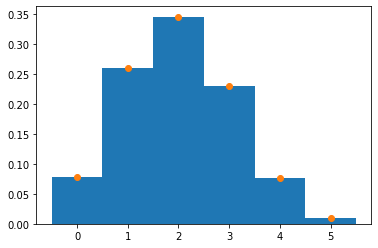

In [38]:
plt.hist(count_tops, weights=weight_all, bins=intervals)
plt.plot([0,1,2,3,4,5],stats.binom(n=5,p=0.4).pmf([0,1,2,3,4,5]),'o')

## ポワソン分布

### 例４　稀な現象の二項分布による分析（ポワソン分布への導入）

だいたい100年に１回おこるできごとがあるとします。それが100年間に2回とか3回おこる可能性はどれくらいでしょう？  
100年間に1回もおこらない可能性はどれくらいでしょう？

まずは、確率p=0.01で、100回の試行したとき、確率変数0, 1, 2, 3, ..., 99, 100の確率分布を２項分布B(100, 0.01)で計算しましょう。  
そのためにまず、NumPy, SciPyをインポートし、確率変数の配列を作ります。

In [44]:
import numpy as np
from scipy import stats
number_events = np.arange(0,101)

確率変数の一覧の確認です。

In [2]:
number_events

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

それぞれの確率変数に対する、２項分布の確率分布です。離散値をとりますので、pmf()メソッドを用います。

In [8]:
prob_occurrences = stats.binom(n=100,p=0.01).pmf(number_events)
prob_occurrences

array([3.66032341e-001, 3.69729638e-001, 1.84864819e-001, 6.09991658e-002,
       1.49417149e-002, 2.89778712e-003, 4.63450803e-004, 6.28634566e-005,
       7.38169377e-006, 7.62195092e-007, 7.00603569e-008, 5.79011214e-009,
       4.33771028e-010, 2.96595574e-011, 1.86174711e-012, 1.07818351e-013,
       5.78570698e-015, 2.88769689e-016, 1.34499911e-017, 5.86336668e-019,
       2.39865000e-020, 9.23001445e-022, 3.34789321e-023, 1.14684089e-024,
       3.71661399e-026, 1.14126329e-027, 3.32535923e-029, 9.20600759e-031,
       2.42438151e-032, 6.07995362e-034, 1.45345693e-035, 3.31515102e-037,
       7.22049939e-039, 1.50288937e-040, 2.99149103e-042, 5.69807815e-044,
       1.03921178e-045, 1.81571264e-047, 3.04066711e-049, 4.88270812e-051,
       7.52134332e-053, 1.11180241e-054, 1.57759361e-056, 2.14941107e-058,
       2.81259025e-060, 3.53546698e-062, 4.26988766e-064, 4.95538219e-066,
       5.52683620e-068, 5.92445851e-070, 6.10398756e-072, 6.04474902e-074,
       5.75354899e-076, 5

平均が（誤差を考えるとほぼ）1になることを確認します。

In [22]:
sum(number_events * prob_occurrences)

0.9999999999999999

分散を「２乗の平均　ー　平均の２乗」で計算すると、これも、ほぼ１になります。その理由はこのあと「ポワソン分布の確率関数」のところで説明します。

In [19]:
sum(number_events * number_events *prob_occurrences) - (sum(number_events * prob_occurrences))**2

0.99

確率分布をプロットします。

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

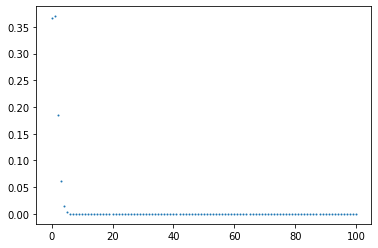

In [27]:
plt.plot(number_events,prob_occurrences,'o',ms=1)

このように、1回起こる確率が最も高く0.370なのですが、0回の確率はそれと同じくらい（0.367）で、2回起こっても不思議ではなく（0.185）、3回起こる確率も無視できません（0.0610）。

### ポワソン分布の確率関数

上の例のような二項分布は「ポワソン分布」によって近似されます。ポワソン分布は二項分布が次のような場合に生じます。  
- 二項分布$B(n,p)$において期待値$np = \lambda$を固定する。
- 試行回数と成功確率について$n \rightarrow \infty$, $p \rightarrow 0$のような極限をとる

従って、ポワソン分布の確率関数は、$$f(x) = e^{-x}\lambda^x / x! \;\;\; (x = 0, 1, 2, ...)$$の形に表されます。パラメータは$\lambda$だけになります。

ポワソン分布の期待値$E[X]$と分散$V[X]$はいずれも$\lambda$になります。  
すなわち、$E[X] = V[X] = \lambda$です。

### 例５ Scipyに含まれるポワソン分布の確率関数

Scipyのstats.poisson.pmf([0,1,2,..,n],$\lambda$)関数が、ポワソン分布において、$x = 0,1,2,...,n $に対する確率関数です。$\lambda$は上で見たように、期待値（平均値）です。

例４の計算を、「ポワソン分布」を仮定して行ってみましょう。SciPyのstats.poisson.pmf()関数を使います。  
この関数の引数は、確率変数（この場合、0から100の配列）とパラメータmu（=平均）です。stats.binom.pmf()と同様に確率変数の配列を与えられたとき、それらのprobability mass functionを収納した配列を返します。

In [45]:
prob_occurrences_2 = stats.poisson.pmf(number_events,1)

二項分布で計算した確率分布とポワソン分布を仮定して計算した確率分布とに対して、プロットを重ね描きします。  
すると、ほとんど重なっていることがわかります。

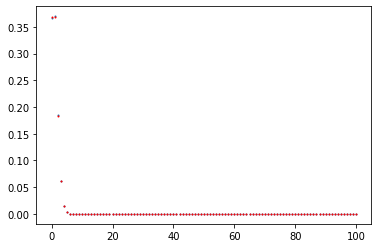

In [31]:
plt.plot(number_events,prob_occurrences,'o',ms=1)
plt.plot(number_events,prob_occurrences_2,'o',ms=1,color='r') #赤がポワソン分布

このように、この場合は、ポワソン分布で２項分布を代用できることがわかります。  
ある単位（時間とか、面積とか）の中の期待値が1ぐらいのとき、ポワソン分布は２項分布の代用として使えます。

平均を計算します。

In [50]:
mu = sum(number_events * prob_occurrences_2)
print(mu)

1.0


分散を計算します。

In [51]:
sum((number_events - mu)**2 * prob_occurrences_2)

1.0

### パラメータ$\lambda$の値によるポワソン分布の形の違い

さて、期待値が1のとき、ポワソン分布はこのような形になりましたが、期待値$\lambda$が変わると、分布の形が変わります。  
下のプログラムで、mu（$\mu$）はポワソン分布の$\lambda$と同じです。

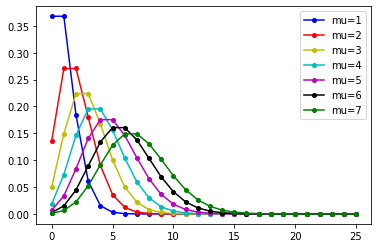

In [131]:
number_events_2 = np.arange(0,26,1)
plt.plot(number_events_2,stats.poisson.pmf(number_events_2,1),'-o',ms=4, label='mu=1',color='b')
plt.plot(number_events_2,stats.poisson.pmf(number_events_2,2),'-o',ms=4, label='mu=2',color='r')
plt.plot(number_events_2,stats.poisson.pmf(number_events_2,3),'-o',ms=4, label='mu=3',color='y')
plt.plot(number_events_2,stats.poisson.pmf(number_events_2,4),'-o',ms=4, label='mu=4',color='c')
plt.plot(number_events_2,stats.poisson.pmf(number_events_2,5),'-o',ms=4, label='mu=5',color='m')
plt.plot(number_events_2,stats.poisson.pmf(number_events_2,6),'-o',ms=4, label='mu=6',color='k')
plt.plot(number_events_2,stats.poisson.pmf(number_events_2,7),'-o',ms=4, label='mu=7',color='g')

plt.legend()

このように、単位時間・面積等における期待値が大きくなればなるほど、ポワソン分布は左右対称に近づきます。次に説明するように、正規分布に近づきます。

### ポワソン分布の使い方

#### 練習問題１

ある商品の需要が週平均３個のポワソン分布に従うものとする。  
(a) 週間需要0の確率はどれほどか。  
(b) 品切れの確率を5%に抑えるためには週初めの在庫をいくらにしておけばよいか。確率を1%に抑えるためにはどうするか。

解答：  
(a) $P(0) = e^{-3} 3^0/0! = 0.050$ （計算は下欄ですがPythonを使うまでもなくGoogleでexp(-3)と検索すれば、できますね）

In [55]:
import numpy as np
np.exp(-3)

0.049787068367863944

あるいは、stats.poisson(mu=3).pmf([0])とします。

In [57]:
from scipy import stats
stats.poisson(mu=3).pmf([0])

array([0.04978707])

(b) 品切れ確率を5%に抑えるには、累積分布関数$F(X \geqq x) \leqq 0.05$となるような$x$を求めます。累積分布関数は通常は$F(X \leqq x)$の形で定義され、ポワソン分布の場合、scipy.stats.poisson(mu=$\mu$).ppf(q=$q$)を使います(PPF: Percent Point Function)。  
この場合、需要がある個数を超える確率が0.05ということは、需要がある個数までに収まる累積確率が0.95ということですので、$q=0.95$となります。また、平均値$\mu = 3$です。

In [58]:
stats.poisson(mu=3).ppf(q=0.95)

6.0

品切れ確率を0.01に抑えるための在庫の計算には、同様にして、$F(X \leqq x) = 0.99$となるような$x$を求めます。

In [59]:
stats.poisson(mu=3).ppf(q=0.99)

8.0

#### 練習問題２

ミサイルの部品の故障の確率はいずれも0.001で、ミサイルは500の部品でできているものとする。  
(a) ミサイルを打ち上げて作動しない確率はどれほどか。  
(b) 無事に作動する確率を0.90とするためには部品の信頼度をどの程度まで上げねばならないか。

解答のヒント：  
(a) 故障部品数の期待値$np = 500 x 0.001 = 0.5$です。ポワソン分布を使って$F(X \gt 0)$を求めましょう。  
(b)故障部品数が0の確率$P(X=0)$を0.90以上にします。ポワソン分布の確率関数は  
scipy.stats.poisson(mu=$\mu$).pmf([$x_1, x_2, ...,x_n$])  
ですが、ある確率変数に対する確率を与えられたときパラメータ$\lambda = \mu$を求めるための関数はないので、ポワソン分布の定義に従って計算します。  
$P(X=x) = e^{-\lambda}\lambda^x/x!$ですから$P(X=0) = e^{-\lambda}\lambda^0/0! = e^{-\lambda}$  
です。

解答：  
(a) $F(X \gt 0) = 1 - F(X \leqq 0) =  1 - P(X = 0) = 1 - e^{-0.5} = 1 - 0.607 = 0.393$　または、

In [69]:
1 - stats.poisson(mu=0.5).cdf(0)

0.3934693402873666

このミサイルはポンコツですね。そこで問(b)があります。

(b) $e^{-\lambda} \geqq 0.90$より、$\lambda \leqq ln(0.90) = -ln(0.90)$です  
各部品の故障確率を$p$とすると$\lambda = 500p$ですから、$p \leqq -ln(0.90)/500 = 0.00021$  
となるので、各部品の故障率は今の1/5のおよそ0.0002まで下げねばなりません。

## 正規分布

ある期間に１回起こるぐらいのできごとについては、二項分布はポワソン分布で代用できることがわかりました。それでは、もっと回数が多くなると、どうでしょうか？  
p=0.25で100回試行したときの確率分布を、二項分布とポワソン分布($\mu$ =25（期待値が25）)とで重ね描きしてみます。

In [83]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

In [84]:
number_events = np.arange(0,101,1) # 確率変数 X: x = 0, 1, 2, ..., 100
prob_occurrences_3 = stats.binom(n=100,p=0.25).pmf(number_events) # 二項分布
prob_occurrences_4 = stats.poisson.pmf(number_events,25) # ポワソン分布

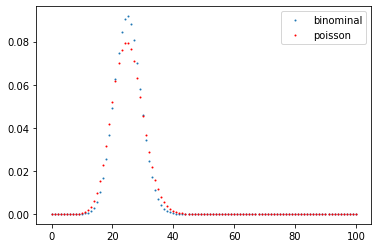

In [3]:
plt.plot(number_events,prob_occurrences_3,'o',ms=1, label='binominal')
plt.plot(number_events,prob_occurrences_4,'o',ms=1,color='r', label ='poisson') #赤がポワソン分布
plt.legend()

このように、二項分布とポワソン分布との分布の違いが顕著になります。  

このような場合、正規分布を使います。

### 正規分布の確率密度関数

確率変数の配列$x$に対する正規分布の確率密度関数$f(x)$は、scipy.stats.norm.pdf(x,loc=$\mu$,scale=$\sigma$)で得られます。ただし、$\mu$は平均、$\sigma^2$は分散（つまり$\sigma$は標準偏差）です。

この場合、$x = [0,1,2,...,100]$つまり0から100までの整数の配列です（下のnumber_events）また、平均$\mu$=100xp = 100x0.25 = 25です。標準偏差$\sigma$は、二項分布の分散すなわち$100*0.25*(1-0.25)$の平方根です。従って、確率分布は次のようになります。

In [85]:
prob_occurrences_5 = stats.norm.pdf(number_events,loc=25,scale=np.sqrt(100*0.25*0.75))

この確率分布の、平均値周辺の値を見てみましょう。平均値25に対する確率密度関数の値は、配列の添字25に入っています。

In [20]:
prob_occurrences_5[23:28]

array([0.08281036, 0.08970739, 0.09213177, 0.08970739, 0.08281036])

同じ範囲の確率変数に対する二項分布の確率とくらべてみます。

In [21]:
prob_occurrences_3[23:28]

array([0.08470922, 0.0905918 , 0.09179969, 0.08826893, 0.08064075])

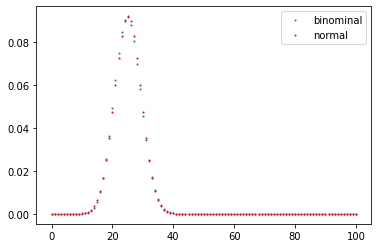

In [22]:
plt.plot(number_events,prob_occurrences_3,'o',ms=1, label='binominal')
plt.plot(number_events,prob_occurrences_5,'o',ms=1,color='r', label ='normal') #赤が正規分布
plt.legend()

このように、ほとんど一致しました。

なお、数学的には、$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \sigma)^2}{2\sigma^2}}$$となります。

### 正規分布を合併したものの性質

正規分布には次のような性質があります。
- 確率変数が、平均$\mu$, 分散$\sigma^2$の正規分布$N(\mu, \sigma^2)$に従うとき、Xの１次関数$aX + b$も正規分布に従い、その平均は$E(aX + b) = a\mu + b$、分散は$V(aX + b) = a^2\sigma^2$となります。すなわち、$aX + b$は正規分布$N(a\mu + b, a^2\sigma^2)$に従います。
- 上の特殊な場合として、$Z = \frac{X - \mu}{\sigma}$と変換すると、$Z$は平均0, 分散1の正規分布$N(0,1)$（標準正規分布）に従います。このとき、$$f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$となります。
- 確率変数$X$と$Y$とが独立に正規分布$N(\mu_1, \sigma_1^2)$, $N(\mu_2, \sigma_2^2)$に従うとき、$X + Y$も正規分布に従い、その分布は$N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$になります。

#### 実験1 正規分布の合併

このように、正規分布の性質から、正規分布を合併したものもまた正規分布になります。シミュレーションで確かめてみましょう。

- 集団A: 平均75, 分散25（標準偏差5）の正規分布を示す1000個の数  
- 集団B: 平均30, 分散16（標準偏差4）の正規分布を示す1000個の数  
を次のようにして生成します。

In [73]:
generator = np.random.default_rng(12345)
pop_A = generator.normal(loc=75, scale=5, size=1000)
pop_B = generator.normal(loc=30, scale=4, size=1000)

生成されたそれぞれの集合の平均と分散を調べましょう。

In [74]:
print(np.mean(pop_A))
print(np.var(pop_A))
print(np.mean(pop_B))
print(np.var(pop_B))

75.04129196042138
25.767588547481136
30.145524791021423
16.226486888762388


集団Aのヒストグラムは次のようになります。なお、階級の端の値を決めるために最大値と最小値を調べました。

(array([  0.,   2.,  10.,  15.,  35.,  54.,  98., 119., 163., 152., 136.,
         93.,  66.,  35.,  14.,   5.,   1.,   2.,   0.]),
 array([57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89,
        91, 93, 95]),
 <BarContainer object of 19 artists>)

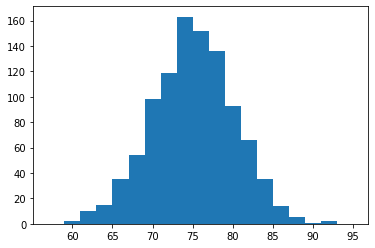

In [76]:
intervals_a = np.arange(57,97,2) # ヒストグラムの階級の左端の値の配列。中心が58, 60, 62, ...94になるように。
plt.hist(pop_A,bins=intervals_a) # 集団Aの確率変数のヒストグラムを描く。

集団Bのヒストグラムは次のようになります。

(array([  0.,   1.,  17.,  22.,  62.,  99., 179., 212., 173., 126.,  63.,
         32.,   7.,   5.,   2.]),
 array([15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45]),
 <BarContainer object of 15 artists>)

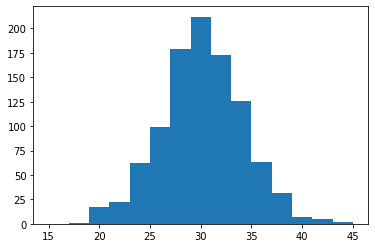

In [77]:
intervals_b = np.arange(15,47,2) # ヒストグラムの階級の左端の値の配列。中心が16, 18, 20, ...46になるように。
plt.hist(pop_B,bins=intervals_b) # 集団Aの確率変数のヒストグラムを描く。

このとき、集団C：集団Aと集団Bの値を足したもの　とします。  
「値を足す」とは、対応する要素の値を足すことで、例えば、タプル(1,2,3)と(4,5,6)からは(5,7,9)ができます。

In [78]:
pop_C = pop_A + pop_B

In [79]:
print(np.mean(pop_C))
print(np.var(pop_C))
print(np.mean(pop_A)+np.mean(pop_B))
print(np.var(pop_A)+np.var(pop_B))

105.18681675144282
42.94173938544988
105.18681675144279
41.99407543624352


となり、集団Cの平均ならびに分散が、それぞれ、集団AとBとの平均の和、ならびに、分散の和にほぼ等しいことがわかります。

そこで、集団Cの、理論上の平均（105）と分散（41）に等しいような、正規分布$N(105,41)$を作り、重ねてみましょう。

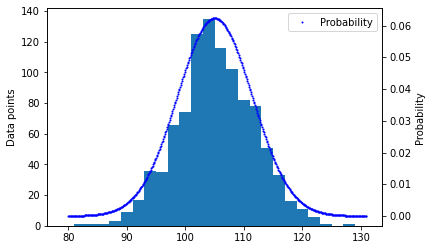

In [99]:
# figureインスタンスを作る
fig = plt.figure()
# Y軸を2つ作る。
ax1 = fig.subplots() # 1つめのY軸（左側）
ax2 = ax1.twinx() # 2つめのY軸　（右側）

x_val = np.arange(80,131,0.1) # 正規分布の確率分布をプロットするための、確率変数の配列
intervals = np.arange(79,133,2) # ヒストグラムの階級の左端の値の配列。中心が80, 82, 84, ...130になるように。

ax1.hist(pop_C,bins=intervals) # 集団Ｃの確率変数のヒストグラムを描く。Y軸は左側。
# 次に正規分布の確率分布をプロットする。Y軸は右側
#集団Cの平均と標準偏差から仮定される正規分布
prob_occurrences_7 = stats.norm.pdf(x_val,loc=105,scale=np.sqrt(41))
ax2.plot(x_val,prob_occurrences_7,'o',ms=1,color='b', label='Probability')
# 次に、正規分布の確率分布に従ったとき、ヒストグラムの各階級の中心の値に対して頻度を予測する。
points_1 = np.arange(80,132,2) # 予測対象のX軸の値の配列
ax1.set_ylabel("Data points", fontsize=10) # 左側のY軸のラベル
ax2.set_ylabel("Probability", fontsize=10) # 右側のY軸のラベル

# 両方のY軸の凡例を重ならないように描くための方法
h1, l1 = ax2.get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2)

### 正規分布の使い方

正規分布は連続関数つまり「確率密度関数」です。ですから、確率変数が区間[a, b]をとる確率がどれだけか、という使い方をします。また、標準正規分布になおして使うことも多いです。

#### 練習問題３ 偏差値と割合

偏差値  $\equiv 10 \times \frac{X - \mu}{\sigma} + 50 = 10Z + 50$です。得点が正規分布だとして、偏差値60以上の人の割合はどれだけですか？

ヒント：  
- $Z \geqq 1$です。
- $Z$が1以下の人の割合は、標準正規分布$N(0,1)$に対して累積分布関数$F(X \leqq 1)$を求めます。
- 標準正規分布$N(0,1)$の$F(X \leqq 1)$は、scipy.stats.norm(loc=0,scale=1).cdf(1)で求められます。
- $F(X \geqq 1)$は、1から上の値を引くか、scipy.stats.norm(loc=0,scale=1).sf(1)で求められます。

解答：

In [102]:
from scipy import stats
stats.norm(loc=0,scale=1).sf(1)

0.15865525393145707

#### 練習問題４ 連続的な値で品質が表される場合の、不良品の確率

ピーナツの缶に正味量1ポンドと表示されている。缶詰め作業は$\mu=1.05$ポンド、$\sigma = 0.02$ポンドで工程管理されている。中身が表示量に達しない確率を求めよ。缶の内容量$x$は正規分布に従うものとする。

ヒント：中身が1ポンドのときの$Z = \frac{1 - 1.05}{0.02} = -2.5$です。

解答：

In [103]:
from scipy import stats
stats.norm(loc=0,scale=1).cdf(-2.5)

0.006209665325776132

#### 練習問題５ 求められる品質管理の程度

ある製品の寿命が平均200時間だとして、この製品の90%以上が150時間以上の寿命を有するためには、寿命分布の標準偏差を最大どれだけに抑えることが必要か？

ヒント：  
- 寿命が150時間に満たない製品の割合は、0.1です
- まず、パーセント・ポイント関数 scipy.stats.norm.ppf()を使って、$Z$を求めます。
- $Z = \frac{X - \mu}{\sigma}$より、$\sigma = \frac{X - \mu}{Z}$です。

解答：

In [109]:
z_min = stats.norm(loc=0,scale=1).ppf(0.1)
print(z_min)
sigma_min = (150 - 200)/z_min
print(round(sigma_min,1),"時間")

-1.2815515655446004
39.0 時間


## 指数分布

### 指数分布の定義

ポワソン分布に従うような事象が起こる間隔は、「指数分布」に従います。  
すなわち、ポワソン分布の定数$\lambda$（すなわち、単位時間や単位面積等における平均$\mu$に相当）に対して、その確率密度関数は  
$$
    % コメントは"%"で始める
    % 空白は表示に影響しないので、連続する記号と記号とは空白で区別する
    % （空白を入れたければ"\quad"を使う
    % 下付き文字は"_a"、上付き文字は"^a"
    % 改行は"\\"を付ける
    f_{(x)} = \lambda e^{-\lambda x}\\
    % 複数文字を1要素とする際は{...}で囲う
$$
となります。

### 指数分布の期待値と分散

ポワソン分布では、期待値も分散も$\lambda$になりますが、指数分布では、期待値も標準偏差も$\frac{1}{\lambda}$となります。

### 例：scipy.statsでの指数分布の扱い

さきほどの100年に１回の事象がおこる間隔の確率分布は、対応するポワソン分布が、1単位（100年間）に平均1, 分散1（つまり標準偏差1）ですので、stats.expon.pdf()関数を用いて、次のように得られます。横軸の単位は、100年になります。

In [110]:
import numpy as np
from scipy import stats
intervals_2 = np.arange(0,11,0.1)
prob_occurrences_6 = stats.expon.pdf(intervals_2,scale=1)

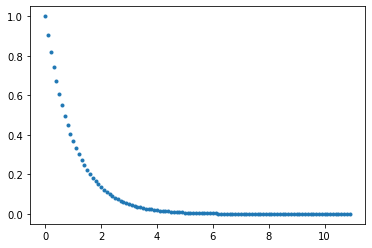

In [111]:
plt.plot(intervals_2,prob_occurrences_6,'o',ms=3)

#### 注意：指数分布の確率密度関数の意味とその利用法

指数分布の確率密度関数は、指数分布の定義より、事象が「ｘ単位経過後の時間までは起こらず、ｘ単位経過後で始めておこる」確率を示します。事象どうしは独立なので、今起こる確率と今の直後に起こる確率は同じです。そして、時間が経つほどその確率は小さくなります。  
ですから、より実用的な、「今からｘ単位後までに起こる」確率の計算のためには、これを時間0からxまで積分して累積確率密度を求める必要があります。stats.expon.cdf()関数を用います。

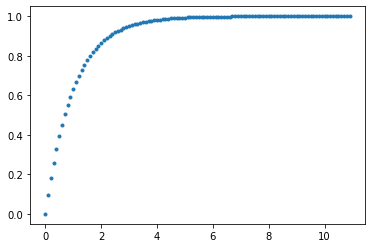

In [24]:
prob_occurrences_7 = stats.expon.cdf(intervals_2,scale=1) # 累積確率密度分布
plt.plot(intervals_2,prob_occurrences_7,'o',ms=3)

ちょうど1単位(100年)のところで確率が0.5になっているのがわかります。つまり、ここまではまだ起こらない確率のほうが高く、これ以降は、すでに起こっている確率のほうが高くなります。

### 指数分布を使う

#### 練習問題6 イベントの間隔

あるコールセンターに電話が１時間平均240回の割合でかかっている。次の電話が20秒以内にかかる確率はどれほどか。

ヒント：
- 電話の平均到着間隔は、60x60/240 = 15[秒]です。
- 平均15の指数分布に対して、$F(X \leqq 20)$は、stats.expon(scale=15).cdf(20)で求めます。

In [113]:
from scipy import stats
stats.expon(scale=15).cdf(20)

0.7364028618842733

#### 練習問題７　ポワソン分布のパラメータを与えられた場合

ある売り場への客の到着数が１分間に平均４人のポワソン分布に従うものとする。  
(a) 到着間隔が2分を超える確率を求めよ  
(b) 到着間隔が30秒以下の確率を求めよ

ヒント：  
- ポワソン分布のパラメータ$\lambda$に対し、平均間隔は$\frac{1}{\lambda}$単位時間になります。
- (a) では、scipy.stats.expon.sf()関数を用います。scaleパラメータは平均間隔です。
- (b) では、scipy.stats.expon.cdf()関数を用います。

解答：(a)

In [115]:
from scipy import stats
stats.expon(scale=0.25).sf(2)

0.00033546262790251185

解答：(b)

In [116]:
stats.expon(scale=0.25).cdf(0.5)

0.8646647167633873